# 01_eda.ipynb — Data exploration & insights

Цей ноутбук: EDA датасету StackOverflow duplicates (title-title pairs): розподіл цілі, довжини текстів, приклади, базові інсайти.

## Installs (Colab)

In [1]:
!pip install -q datasets scikit-learn pandas matplotlib

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load dataset

In [3]:
from datasets import load_dataset

dataset = load_dataset(
    "sentence-transformers/stackexchange-duplicates",
    "title-title-pair"
)

# Convert to pandas for convenience
df = dataset["train"].to_pandas()
df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

title-title-pair/train-00000-of-00001.pa(…):   0%|          | 0.00/25.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/304525 [00:00<?, ? examples/s]

,title1,title2
0,what is the advantage of using the GPU renderi...,Can anyone explain all these Developer Options?
1,Blank video when converting uncompressed AVI f...,FFmpeg lossy compression problems
2,URL Rewriting of a query string in php,How to create friendly URL in php?
3,Einstein summation convention,Is there a way to stop the vertical spread of ...
4,"For maximizing photo adjustment performance, w...",What is the best way to improve Aperture 3 pef...


###Довжина заголовків

In [4]:
df["len_title1"] = df["title1"].str.split().apply(len)
df["len_title2"] = df["title2"].str.split().apply(len)

df[["len_title1", "len_title2"]].describe()

,len_title1,len_title2
count,304525.000000,304525.000000
mean,9.050791,9.335145
std,4.166887,3.882339
min,1.000000,1.000000
25%,6.000000,7.000000
50%,8.000000,9.000000
75%,11.000000,11.000000
max,46.000000,42.000000


**Спостереження**

Датасет містить 304 525 пар, і заголовки загалом досить короткі та структуровані.

Основні спостереження:

* Середня довжина заголовка — приблизно 9 слів, з невеликим стандартним відхиленням.

* Медіана становить 8–9 слів, що вказує: більшість заголовків є лаконічними.

* IQR (міжквартильний розмах) - від 6 до 11 слів, тобто 50% заголовків мають компактну довжину.

* Деякі заголовки дуже короткі (1–2 слова), що може знижувати семантичну інформативність.

* Є й довгі заголовки, до 40+ слів - вони більш деталізовані та можуть містити кілька підзапитань.

У цілому, датасет складається зі стислих, інформативних заголовків, характерних для технічних питань StackOverflow.

Це добре підходить для задачі семантичної схожості, оскільки:

* заголовки містять достатньо змістовних слів,

* вони не надто довгі (немає "зашумлення"),

* їх структура є досить стабільною.

Простий графік порівняння розподілу довжин заголовків.

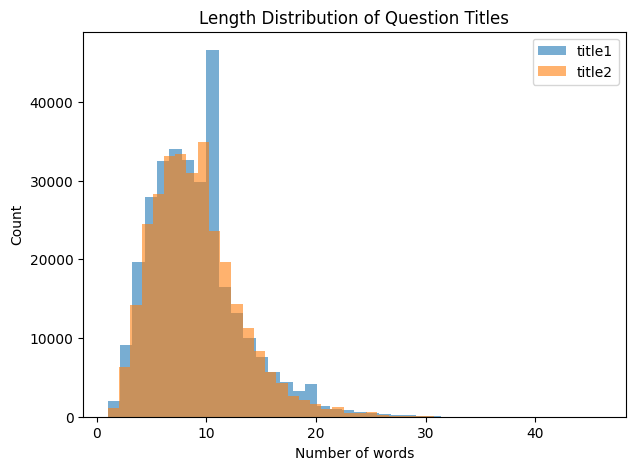

In [5]:
plt.figure(figsize=(7,5))
plt.hist(df["len_title1"], bins=40, alpha=0.6, label="title1")
plt.hist(df["len_title2"], bins=40, alpha=0.6, label="title2")
plt.legend()
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.title("Length Distribution of Question Titles")
plt.show()

Обидва заголовки в кожній парі мають дуже схожий розподіл довжини.
Це підтверджує, що набір даних збалансований з точки зору структурних характеристик пар запитань.

Можемо ще глянути наскільки заголовки схожі.

In [6]:
for i in range(5):
    print(f"PAIR {i}")
    print("Q1:", df.loc[i, "title1"])
    print("Q2:", df.loc[i, "title2"])
    print("-" * 80)

PAIR 0
Q1: what is the advantage of using the GPU rendering options in Android?
Q2: Can anyone explain all these Developer Options?
--------------------------------------------------------------------------------
PAIR 1
Q1: Blank video when converting uncompressed AVI files with ffmpeg
Q2: FFmpeg lossy compression problems
--------------------------------------------------------------------------------
PAIR 2
Q1: URL Rewriting of a query string in php
Q2: How to create friendly URL in php?
--------------------------------------------------------------------------------
PAIR 3
Q1: Einstein summation convention
Q2: Is there a way to stop the vertical spread of multiple super- and sub-scripts?
--------------------------------------------------------------------------------
PAIR 4
Q1: For maximizing photo adjustment performance, which hardware upgrades matter most?
Q2: What is the best way to improve Aperture 3 peformance on an iMac?
--------------------------------------------------------

**Приклади демонструють, що:**

* Частина пар містить сильну семантичну схожість (Pair 2).

* Деякі пари торкаються близьких тем, але різних питань (Pair 0, 1, 4).

* Інші ж можуть бути семантично далекими (Pair 3).

Це підтверджує, що задача semantic similarity / duplicate detection справді нетривіальна.

Модель повинна вміти:

* розуміти контекст,

* визначати тематичну близькість,

* але чітко відрізняти схожі запитання від справжніх дублікатів.